# Introduction to Pandas/NumPy- Part-1

Following the content in A comprehensive Learning path to become a data scientist in 2019 by Analytics Vidhya.
### Dataset available at http://datahack.analyticsvidhya.com/contest/practice-problem-loan-prediction-iii

### I'm also moving away from what AV has show using Matplotlib.. I'm attempting to use Seaborn as much as possible.


## Links
* https://www.analyticsvidhya.com/blog/2016/01/12-pandas-techniques-python-data-manipulation/
* https://www.analyticsvidhya.com/blog/2016/01/guide-data-exploration/
* Checking for Normality : https://machinelearningmastery.com/a-gentle-introduction-to-normality-tests-in-python/


In [86]:
import seaborn as sns

In [87]:
import pandas as pd
# import matplotlib as plt
# import numpy
%pylab inline
# %matplotlib inline

Populating the interactive namespace from numpy and matplotlib


/home/deepak/anaconda2/envs/av/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['table']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [88]:
df = pd.read_csv("train_u6lujuX_CVtuZ9i.txt")

In [89]:
df.head().transpose()

,0,1,2,3,4
Loan_ID,LP001002,LP001003,LP001005,LP001006,LP001008
Gender,Male,Male,Male,Male,Male
Married,No,Yes,Yes,Yes,No
Dependents,0,1,0,0,0
Education,Graduate,Graduate,Graduate,Not Graduate,Graduate
Self_Employed,No,No,Yes,No,No
ApplicantIncome,5849,4583,3000,2583,6000
CoapplicantIncome,0,1508,0,2358,0
LoanAmount,NaN,128,66,120,141
Loan_Amount_Term,360,360,360,360,360


In [98]:
df.groupby(["Loan_Status"]).describe().transpose()

Loan_Status                         N             Y
ApplicantIncome   count    192.000000    422.000000
                  mean    5446.078125   5384.068720
                  std     6819.558528   5765.441615
                  min      150.000000    210.000000
                  25%     2885.000000   2877.500000
                  50%     3833.500000   3812.500000
                  75%     5861.250000   5771.500000
                  max    81000.000000  63337.000000
CoapplicantIncome count    192.000000    422.000000
                  mean    1877.807292   1504.516398
                  std     4384.060103   1924.754855
                  min        0.000000      0.000000
                  25%        0.000000      0.000000
                  50%      268.000000   1239.500000
                  75%     2273.750000   2297.250000
                  max    41667.000000  20000.000000
LoanAmount        count    181.000000    411.000000
                  mean     151.220994    144.294404
                  std       85.862783     85.484607
                  min        9.000000     17.000000
                  25%      100.000000    100.000000
                  50%      129.000000    126.000000
                  75%      176.000000    161.000000
                  max      570.000000    700.000000
Loan_Amount_Term  count    186.000000    414.000000
                  mean     344.064516    341.072464
                  std       69.238921     63.247770
                  min       36.000000     12.000000
                  25%      360.000000    360.000000
                  50%      360.000000    360.000000
                  75%      360.000000    360.000000
                  max      480.000000    480.000000
Credit_History    count    179.000000    385.000000
                  mean       0.541899      0.981818
                  std        0.499639      0.133782
                  min        0.000000      0.000000
                  25%        0.000000      1.000000
                  50%        1.000000      1.000000
                  75%        1.000000      1.000000
                  max        1.000000      1.000000

## Describing the data and Analysis.
1) Count - Max Count = 614 . Min Count = 592 . Suggessting Missing Values

In [65]:
print(df.median(),"\n")
print(df.mean())

ApplicantIncome      3812.5
CoapplicantIncome    1188.5
LoanAmount            128.0
Loan_Amount_Term      360.0
Credit_History          1.0
dtype: float64 

ApplicantIncome      5403.459283
CoapplicantIncome    1621.245798
LoanAmount            146.412162
Loan_Amount_Term      342.000000
Credit_History          0.842199
dtype: float64


### The Median and Mean Suggest a skew in the data

### Chekcing for Missing Values

In [56]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [23]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


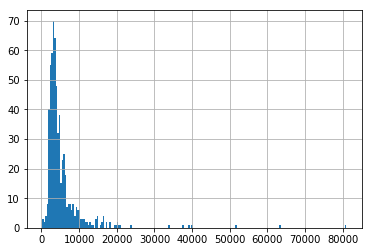

In [25]:
df['ApplicantIncome'].hist(bins=200)


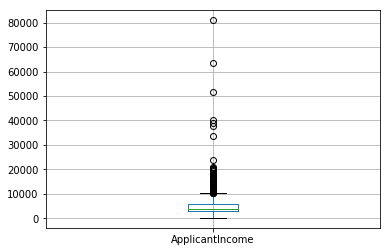

In [26]:
df.boxplot(column='ApplicantIncome')


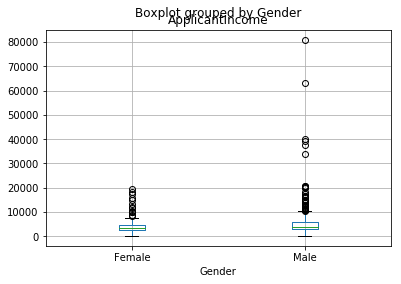

In [87]:
df.boxplot(column='ApplicantIncome', by = 'Gender')


In [45]:
temp1 = df['Credit_History'].value_counts(ascending=True) 
temp2 = df.pivot_table(values='Loan_Status',index=['Credit_History'],aggfunc=lambda x: x.map({'Y':1,'N':0}).mean()) 
print ('Frequency Table for Credit History:' )
print (temp1) 
print ('\nProbility of getting loan for each Credit History class:' )
print (temp2)

Frequency Table for Credit History:
0.0     89
1.0    475
Name: Credit_History, dtype: int64

Probility of getting loan for each Credit History class:
                Loan_Status
Credit_History             
0.0                0.078652
1.0                0.795789


Text(0.5, 1.0, 'Probability of getting loan by credit history')

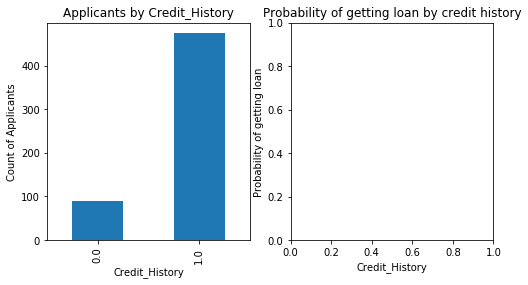

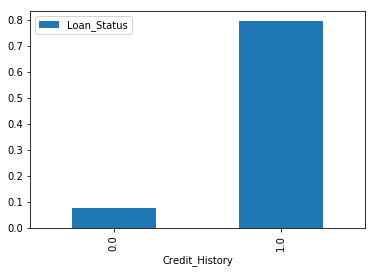

In [46]:
fig = plt.figure(figsize=(8,4)) 
ax1 = fig.add_subplot(121) 
ax1.set_xlabel('Credit_History') 
ax1.set_ylabel('Count of Applicants') 
ax1.set_title("Applicants by Credit_History") 
temp1.plot(kind='bar') 
ax2 = fig.add_subplot(122) 
temp2.plot(kind = 'bar') 
ax2.set_xlabel('Credit_History') 
ax2.set_ylabel('Probability of getting loan') 
ax2.set_title("Probability of getting loan by credit history")

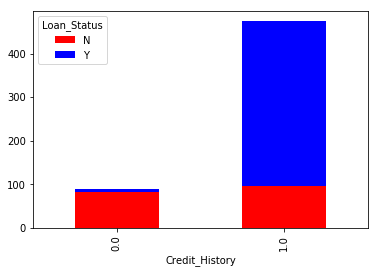

In [95]:
temp3 = pd.crosstab(df['Credit_History'], df['Loan_Status'])
temp3.plot(kind='bar', stacked=True, color=['red','blue'], grid=False)


In [53]:
sns.set_style("white")

## Using SNS for crosstab visualization. 
#### Seaborn doesn't have an out of the box crosstab fucntion. However, with the help of friends in stackoverflow.
https://stackoverflow.com/questions/43544694/using-pandas-crosstab-with-seaborn-stacked-barplots


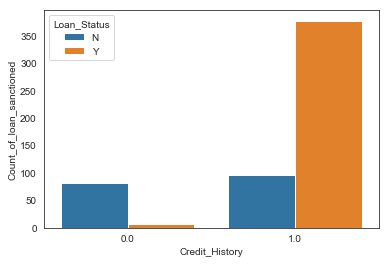

In [54]:
ct = pd.crosstab(df['Credit_History'], df['Loan_Status'])
stacked = ct.stack().reset_index().rename(columns={0:'Count_of_loan_sanctioned'})
sns.barplot(x=stacked.Credit_History, y=stacked.Count_of_loan_sanctioned, hue=stacked.Loan_Status)

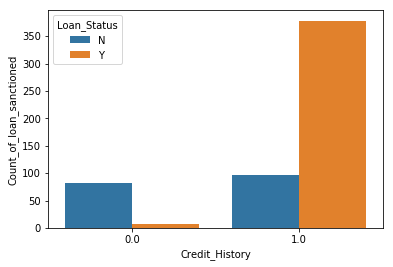

## Check missing values in the dataset


In [119]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

#### A key hypothesis is that the whether a person is educated or self-employed can combine to give a good estimate of loan amount.

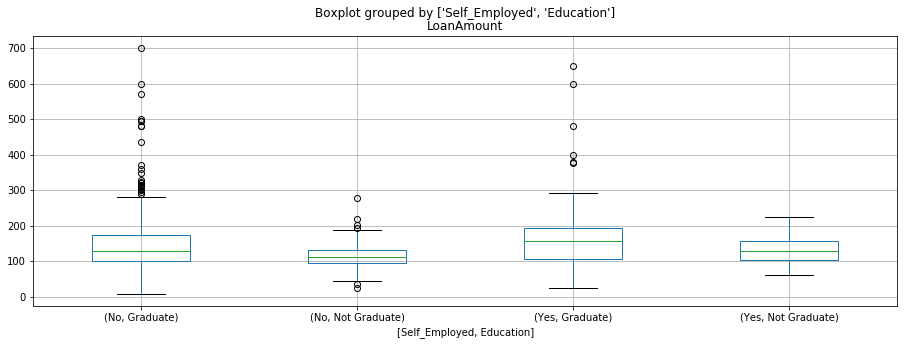

In [7]:
df.boxplot(column='LoanAmount', by = ['Self_Employed','Education'],figsize=(15,5))


In [10]:
df['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [39]:
# Since ~86% values are "No", it is safe to impute the missing values as "No" as there is a high probability of success. This can be done using the following code:

df['Self_Employed'].fillna('No',inplace=True)

### Now, we will create a Pivot table, which provides us median values for all the groups of unique values of Self_Employed and Education features. Next, we define a function, which returns the values of these cells and apply it to fill the missing values of loan amount:



In [12]:
df.pivot_table(values='LoanAmount', index='Self_Employed' ,columns='Education', aggfunc=np.median)

Education,Graduate,Not Graduate
Self_Employed,,
No,130.0,113.0
Yes,157.5,130.0


### Imputing Valiues

In [40]:
# df = pd.read_csv("train_u6lujuX_CVtuZ9i.txt")
df['Self_Employed'].fillna('No',inplace=True)

In [41]:
table = df.pivot_table(values='LoanAmount', index='Self_Employed' ,columns='Education', aggfunc=np.median)
# Define function to return value of this pivot_table 
def fage(x): 
    return table.loc[x['Self_Employed'],x['Education']] 
# Replace missing values 
df['LoanAmount'].fillna(df[df['LoanAmount'].isnull()].apply(fage, axis=1), inplace=True)

### DECONSTRUCTING 
##### df['LoanAmount'].fillna(df[df['LoanAmount'].isnull()].apply(fage, axis=1), inplace=True)

* df[df['LoanAmount'].isnull()] --->  gets the dataframe where the loanAmount is NULL.
* df[df['LoanAmount'].isnull()].apply(fage, axis=1) -- asks fage for the median of LoanAmount for each row in the DF passed for each group, SELF_EMPLOYED,and EDUCATION..
* df['LoanAmount'].fillna(df[df['LoanAmount'].isnull()].apply(fage, axis=1), inplace=True) --> fillna is used to fill in the values obtained by applying fage to the dataframe on the axis=1 -- along columns.

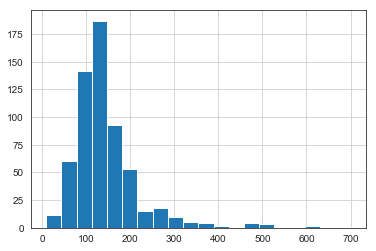

In [58]:
# How to treat for extreme values in distribution of LoanAmount and ApplicantIncome?
df['LoanAmount'].hist(bins=20)

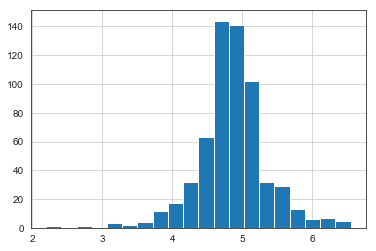

In [59]:
df['LoanAmount_log'] = np.log(df['LoanAmount'])
df['LoanAmount_log'].hist(bins=20)
# sns.(df['LoanAmount_log'])

In [69]:
df['total_income'] = df['ApplicantIncome']+df['CoapplicantIncome']
# df.head().transpose()

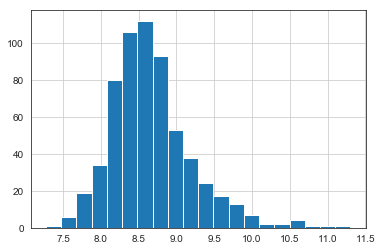

In [70]:
df['TotalIncome'] = df['ApplicantIncome'] + df['CoapplicantIncome'] 
df['TotalIncome_log'] = np.log(df['TotalIncome']) 
df['TotalIncome_log'].hist(bins=20) 


In [71]:
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot
qqplot(df['LoanAmount'], line='s')
pyplot.show()

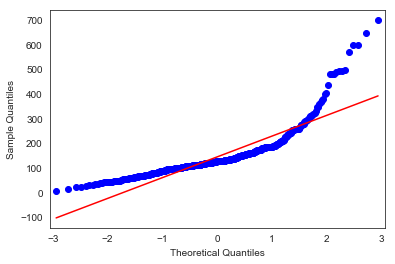

In [85]:
from scipy.stats import shapiro
stat, p = shapiro(df['TotalIncome'])
print('Statistics=%.3f, p=%.99f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0) {0}'.format(p))
else:
    print('Sample does not look Gaussian (reject H0) {0}'.format(p))

Statistics=0.525, p=0.000000000000000000000000000000000000140501717413750369747386413990886757911280824980738999425152632
Sample does not look Gaussian (reject H0) 1.4050171741375037e-37
